<H1>Column Combiner</H1>
<h4> This notebook is used to combines the columns title, from, director, and plot to a single column</h4>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
train_cleaned = pd.read_csv('data/train_cleaned.txt', sep='\t', header=None, names=['title', 'from', 'genre', 'director', 'plot'])

In [42]:
train_cleaned.head()

,title,from,genre,director,plot
0,ela cheppanu,telugu,romance,ramana,sekhar tarun is a graduate from iim and works ...
1,a nightmare on elm street,american,horror,samuel bayer,kris fowles katie cassidy goes to the springwo...
2,american gothic,american,horror,john hough,cynthia is traumatized by the death of her bab...
3,gang,bollywood,crime,mazhar khan,four friends gangu jackie shroff abdul nana pa...
4,intimate relations,british,drama,charles frank,crisis in a middleclass family when the son fa...


In [43]:
train_cleaned['combined_text'] = train_cleaned.apply(
    lambda row: f"Title: {row['title']}. From: {row['from']}. Directed by: {row['director']}. Plot: {row['plot']}", 
    axis=1
)

In [44]:
# drop all old columns and keep only the combined_text and genre columns
train_cleaned = train_cleaned.drop(columns=['title', 'from', 'director', 'plot'])

In [45]:
train_cleaned

,genre,combined_text
0,romance,Title: ela cheppanu. From: telugu. Directed by...
1,horror,Title: a nightmare on elm street. From: americ...
2,horror,Title: american gothic. From: american. Direct...
3,crime,Title: gang. From: bollywood. Directed by: maz...
4,drama,Title: intimate relations. From: british. Dire...
...,...,...
8018,drama,Title: sa 'yo lamang. From: filipino. Directed...
8019,drama,Title: the lemon sisters. From: american. Dire...
8020,romance,Title: dil ne phir yaad kiya. From: bollywood....
8021,romance,Title: rehnaa hai terre dil mein. From: bollyw...


In [46]:
# swap the columns
train_cleaned = train_cleaned[['combined_text', 'genre']]

In [47]:
# save the combined data to a new file
train_cleaned.to_csv('data/train_combined.csv', index=False, header=True)

In [12]:
train_cleaned.head()

,combined_text,genre
0,Title: ela cheppanu. From: telugu. Directed by...,romance
1,Title: a nightmare on elm street. From: americ...,horror
2,Title: american gothic. From: american. Direct...,horror
3,Title: gang. From: bollywood. Directed by: maz...,crime
4,Title: intimate relations. From: british. Dire...,drama


In [18]:
text = pd.read_csv('data/train_combined.csv', header=None)

In [19]:
text.head()

,0,1
0,Title: ela cheppanu. From: telugu. Directed by...,romance
1,Title: a nightmare on elm street. From: americ...,horror
2,Title: american gothic. From: american. Direct...,horror
3,Title: gang. From: bollywood. Directed by: maz...,crime
4,Title: intimate relations. From: british. Dire...,drama


In [22]:
text[0][0]

'Title: ela cheppanu. From: telugu. Directed by: ramana. Plot: sekhar tarun is a graduate from iim and works as a business manager in a firm in hyderabad he meets amar varma siva balaji in a business party who runs a company named varma industries in germany when the party is over sekhar accidentally kills amar with his car sekhars friend sunil sunil saves him by erasing the evidence but sekhar feels guilty even after six months he goes to germany along with sunil to visit amars family they find that their business is in a bad condition and want to help them by reviving it with his business skills priya shriya who was engaged to amar earlier is trying her level best to run the business but helpless to run it smoothly sekhar introduces himself to priya and offer his help to revive the business the remaining story is about how sekhar helps the business grow and win priyas heart in that process'

In [21]:
text.l

0    Title: ela cheppanu. From: telugu. Directed by...
1                                              romance
Name: 0, dtype: object

In [49]:
# get the maximum length of the first column in characters
max_len = text[0].apply(len).max()
# get the average length of the first column in characters
avg_len = text[0].apply(len).mean()

# get the index of the longest text
max_len_index = text[0].apply(len).idxmax()

In [50]:
# get len of first cell in column 0
len(text[0][0])

903

In [48]:
max_len_index

2456

In [51]:
# what percentage has more than 2500 words
len(text[text[0].apply(len) > 2500]) / len(text) * 100

37.47974573102331

In [36]:
# give the number of texts that have more than 512 words
len(text[text[0].apply(len) > 512])

6640

In [37]:
# how many punctuations are there in the mean in each text
text[0].apply(lambda x: sum([1 for c in x if c in ['.', ',', '!', '?']])).mean()

np.float64(3.2265985292284682)

<Axes: >

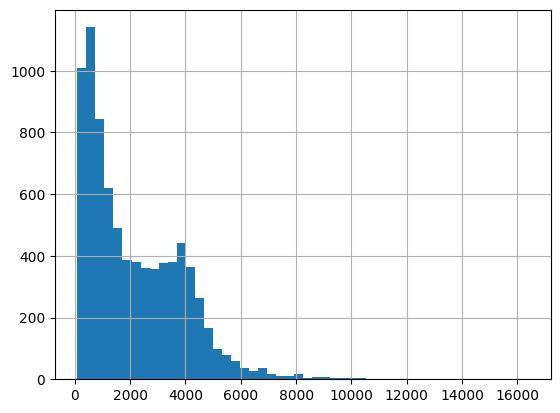

In [34]:
# get histogram of the length of the text
text[0].apply(len).hist(bins=50)

In [29]:
avg_len

np.float64(2153.954630437492)

In [39]:
# get the average and max amount of words in the text 
text[0].apply(lambda x: len(x.split())).mean(), text[0].apply(lambda x: len(x.split())).max()

(np.float64(380.7357596908887), np.int64(3159))

In [24]:
max_len

np.int64(16397)

In [26]:
text[0][max_len_index]

'Title: sworn brothers. From: hong kong. Directed by: david lai. Plot: when lam tingyat was little his father died and he was raised by police officer uncle pau and was very close to his son ngan kwok just like brothers now kwok has become a police inspector who just came back to hong kong after training in the scotland yard and ting is a triad member working for crime lord yeung tunghoi despite being on the opposite side of the law they still maintain a close relationship when kwok came back to hong kong he and his father and ting had dinner and afterwards they went out and competed on who can pee the longest in an alley there they see a police officer shek nicknamed portuguese harass a call girl and ting fights with him and kwok helps him and cuffs shek on a cart and pushes him down the alley the next day kwok reports to the police and is given a case of investigating yeungs gang and shek who has been following this case was assigned as his subordinate to assist him in the files kwok